In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/AB_NYC_2019.txt")
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [4]:
df.last_review = pd.to_datetime(df.last_review)
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

<AxesSubplot:xlabel='price', ylabel='Count'>

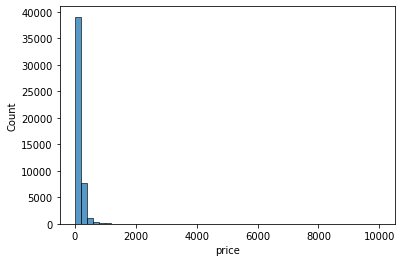

In [5]:
# Plot price
sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

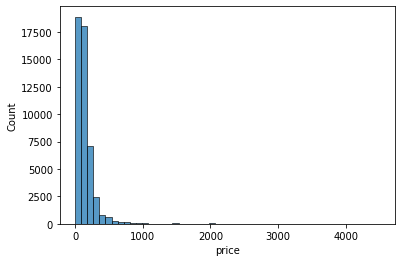

In [6]:
sns.histplot(df.price[df.price < 5000], bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

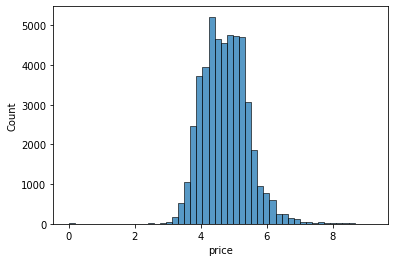

In [7]:
price_logs = np.log1p(df.price)
sns.histplot(price_logs, bins=50)

In [8]:
# Select the needed features
data = df[
    [
        "latitude",
        "longitude",
        "price",
        "minimum_nights",
        "number_of_reviews",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
    ]
]
## Question 1
print("Missing values:", data.reviews_per_month.isna().sum())

Missing values: 10052


In [9]:
## Question 2
print("Median for minimum nights:", data.minimum_nights.median())

Median for minimum nights: 3.0


In [10]:
# Split the data
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train : n_train + n_val]]
df_test = data.iloc[idx[n_train + n_val :]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train["price"]
del df_val["price"]
del df_test["price"]

In [11]:
## Question 3
df_train_1 = df_train.copy()
df_train_2 = df_train.copy()
df_train_1.reviews_per_month = df_train_1.reviews_per_month.fillna(0)
df_train_2.reviews_per_month = df_train_2.reviews_per_month.fillna(
    df_train_2.reviews_per_month.mean()
)

In [12]:
print(df_train_1.reviews_per_month)
print(df_train_2.reviews_per_month)

0        0.71
1        0.00
2        0.43
3        1.88
4        0.80
         ... 
29332    0.00
29333    0.40
29334    3.12
29335    2.10
29336    0.05
Name: reviews_per_month, Length: 29337, dtype: float64
0        0.710000
1        1.368549
2        0.430000
3        1.880000
4        0.800000
           ...   
29332    1.368549
29333    0.400000
29334    3.120000
29335    2.100000
29336    0.050000
Name: reviews_per_month, Length: 29337, dtype: float64


In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [15]:
w0_1, w_1 = train_linear_regression(df_train_1, y_train)
w0_2, w_2 = train_linear_regression(df_train_2, y_train)

In [16]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


y_pred = w0_1 + df_val.dot(w_1)
y_1_rmse = rmse(y_val, y_pred)
print(round(y_1_rmse, 2))

y_pred_2 = w0_2 + df_val.dot(w_2)
y_2_rmse = rmse(y_val, y_pred_2)
print(round(y_2_rmse, 2))

0.61
0.61


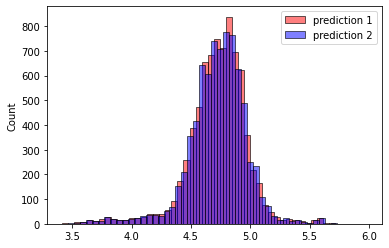

In [18]:
sns.histplot(y_pred, label="prediction 1", color="red", alpha=0.5, bins=50)
sns.histplot(y_pred_2, label="prediction 2", color="blue", alpha=0.5, bins=50)
plt.legend()

In [19]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for i in r:
    w0, w = train_linear_regression_reg(df_train_1, y_train, i)
    y_pred = w0 + df_val.dot(w)
    y_rmse = rmse(y_val, y_pred)
    print("r: ", i, "rmse: ", round(y_rmse, 2))

r:  0 rmse:  0.61
r:  1e-06 rmse:  0.61
r:  0.0001 rmse:  0.61
r:  0.001 rmse:  0.62
r:  0.01 rmse:  0.63
r:  0.1 rmse:  0.65
r:  1 rmse:  0.65
r:  5 rmse:  0.65
r:  10 rmse:  0.65


In [20]:
## Question 5
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
rmse_scores = []
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
## Loop start
for seed in seed_values:
    # Split the data
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = data.iloc[idx[:n_train]]
    df_val = data.iloc[idx[n_train : n_train + n_val]]
    df_test = data.iloc[idx[n_train + n_val :]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train["price"]
    del df_val["price"]
    del df_test["price"]

    # Training
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # RMSE
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    y_rmse = rmse(y_val, y_pred)
    rmse_scores.append(y_rmse)

print(round(np.std(rmse_scores), 3))

0.005


In [21]:
## Question 6
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)

# Split the data
np.random.seed(9)
np.random.shuffle(idx)

df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train : n_train + n_val]]
df_test = data.iloc[idx[n_train + n_val :]]

df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

y_full_train = np.concatenate([y_train, y_val])

del df_full_train["price"]
del df_test["price"]

# Training
X_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)

# # RMSE
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
y_rmse = rmse(y_test, y_pred)

print(round(y_rmse, 2))

0.65
